In [339]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import retrieval_functions as rf
import importlib
importlib.reload(rf)
rf.init_plotting()

In [340]:
experiment = "01_Multiplication" # 506
experiment = "02_Compare" # 507|508|509
# experiment = "03_Share"
# experiment = "04_LogReg" # 526|527|528
# experiment = "05_Reveal" # 512
# experiment = "06_LeNet" # 529|530|531
# experiment = "07_Aes" # 525
# experiment = "08_SecureMean" # 519
# experiment = "09_SecureMin" # 516|517|518
# experiment = "10_PSI" # 520
# experiment = "11_Auction" # 521|522|523
# experiment = "12_VGG" # 532|533|534
# experiment = "15_BitAND" # 524
# experiment = "16_Division" # 510

framworks = ["HPMPC", "mp-slice", "MP-SPDZ"]
# framworks = ["MPyC", "HPMPC", "mp-slice", "MP-SPDZ"]

data = []
base = "./results/Deviation/"
for framework in framworks:
    path= base + framework + "/" + experiment+"/data/short_results.csv"
    frame=pd.read_csv(path ,header=0,sep=';',index_col=False,engine='python')
    frame['framework']=framework
    if framework=="MPyC":
        # assuming your dataframe is df and the time column is 'time'
        frame['runtime_internal(s)'] = pd.to_datetime(frame['runtime_internal(s)'], format='%H:%M:%S.%f').dt.time

        # convert time to seconds
        frame['runtime_internal(s)'] = frame['runtime_internal(s)'].apply(lambda t: t.hour*3600 + t.minute*60 + t.second + t.microsecond*1e-6)
        frame['peakRAM(MiB)']= frame['peakRAM(MiB)']
    elif framework=="HPMPC" or framework=="mp-slice":
        factor = 1
        if frame['splitroles'].max() == 1:
            factor = 6	
        elif frame['splitroles'].max() == 2:
            factor = 24
        else:
            factor=1
        frame['runtime_external(s)'] = pd.to_numeric(frame['runtime_external(s)'])* frame['threads'].max()*factor
    data.append(frame)

In [341]:
import pandas as pd


In [342]:
# fl_paths[-1].split("/")[-2]

In [343]:
# runtime/3600

# inputs,label=rf.get_input_deviation(data)
# rf.plot_deviation(inputs,label,"test.png",experiment,"Input size","Runtime [s]",True)

min bandwidths(Mbs)
100      0.018991
1000     0.013987
10000    0.013987
25000    0.015655
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
100      0.019992
1000     0.011986
10000    0.010985
25000    0.012653
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
100      0.018991
1000     0.011986
10000    0.009984
25000    0.011318
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
0        0.019492
100      0.019992
1000     0.020993
10000    0.020993
25000    0.017990
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
0        0.014988
100      0.022994
1000     0.019992
10000    0.015989
25000    0.014988
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
0        0.019992
100      0.022994
1000     0.016990
10000    0.015989
25000    0.014988
Name: runtime_external(s), dtype: float64
10000
min bandwidths(Mbs)
100      1.531000
1000     0.378000
10000    0.311000
25000    0.308966
Name: runtime_external(s), dtype: float64
10

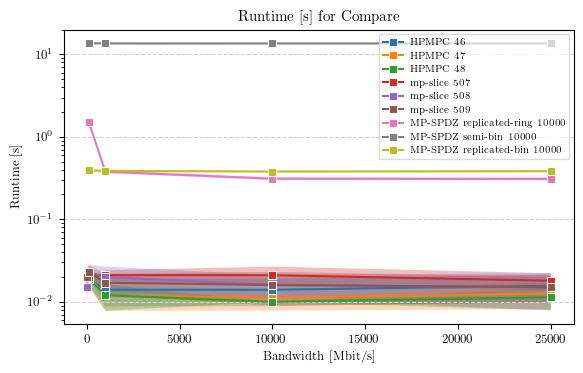

In [344]:
bandwidth,label=rf.get_bandwidth_deviation(data)
# del bandwidth[-2] # Auction
# del bandwidth[-2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del bandwidth[-1]
# del label[-2]
# del bandwidth[-2]

# del bandwidth[3] # DIVISION
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]

print(label)
rf.plot_deviation(bandwidth,label,"test.png",experiment,"Bandwidth [Mbit/s]","Runtime [s]",True)

min latencies(ms)
0     0.015655
25    1.642994
50    3.270000
75    4.891997
Name: runtime_external(s), dtype: float64
min latencies(ms)
0     0.012653
25    0.384996
50    0.760985
75    1.131994
Name: runtime_external(s), dtype: float64
min latencies(ms)
0     0.011318
25    0.235997
50    0.459984
75    0.683995
Name: runtime_external(s), dtype: float64
min latencies(ms)
0     0.018991
25    1.701994
50    3.375989
75    5.056987
Name: runtime_external(s), dtype: float64
min latencies(ms)
0     0.014988
25    0.439992
50    0.865994
75    1.291997
Name: runtime_external(s), dtype: float64
min latencies(ms)
0     0.018324
25    0.289992
50    0.564996
75    0.840000
Name: runtime_external(s), dtype: float64
10000
min latencies(ms)
0     0.308966
25    3.242000
50    6.100000
75    8.941000
Name: runtime_external(s), dtype: float64
10000
min latencies(ms)
0      13.582
25    169.597
50    325.060
75    480.619
Name: runtime_external(s), dtype: float64
10000
min latencies(ms)
0     0.

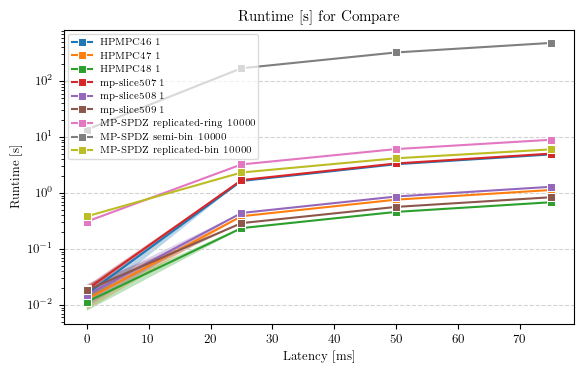

In [345]:
latency,label=rf.get_latency_deviation(data)
# del latency[0] # AUCTION
# del latency[1]
# del latency[2]
# del latency[-2]
# del latency[-2]
# del label[0]
# del label[1]
# del label[2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del latency[-1]
# del label[-2]
# del latency[-2]

# del latency[3] # DIVISION
# del latency[3]
# del label[3]
# del label[3]

# del latency[-2] # secure min
# del latency[-2]
# del label[-2]
# del label[-2]

# del latency[-7] # LogReg
# del latency[-7]
# del latency[-7]
# del latency[-7]
# del latency[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# del label[-7]
# print(latency)
rf.plot_deviation(latency,label,"test.png",experiment,"Latency [ms]","Runtime [s]",True)

min packetdrops(%)
0    0.015655
1    1.878994
2    2.580991
5    7.123328
Name: runtime_external(s), dtype: float64
min packetdrops(%)
0    0.012653
1    1.521991
2    1.781990
5    4.979990
Name: runtime_external(s), dtype: float64
min packetdrops(%)
0    0.011318
1    1.634993
2    1.864987
5    7.835990
Name: runtime_external(s), dtype: float64
min packetdrops(%)
0    0.018991
1    1.883990
2    2.495993
5    5.254992
Name: runtime_external(s), dtype: float64
min packetdrops(%)
0    0.014988
1    1.641994
2    2.013991
5    6.984994
Name: runtime_external(s), dtype: float64
min packetdrops(%)
0    0.018324
1    1.479994
2    2.219990
5    3.479993
Name: runtime_external(s), dtype: float64
min packetdrops(%)
0    0.308966
1    1.698000
2    3.098000
5    5.681000
Name: runtime_external(s), dtype: float64
min packetdrops(%)
0     13.582
1     27.935
2     47.856
5    134.740
Name: runtime_external(s), dtype: float64
min packetdrops(%)
0    0.383
1    1.133
2    1.549
5    3.366
Name:

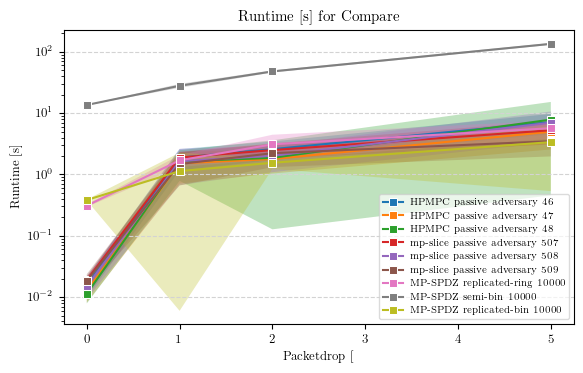

In [346]:
packetdrop,label=rf.get_packetdrop_deviation(data)
# del packetdrop[-2] # Auction
# del packetdrop[-2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del packetdrop[-1]
# del label[-2]
# del packetdrop[-2]

# del packetdrop[3] # Division
# del packetdrop[3]
# del label[3]
# del label[3]

# del packetdrop[-2] # secure min
# del packetdrop[-2]
# del label[-2]
# del label[-2]

print(label)
rf.plot_deviation(packetdrop,label,"test.png",experiment,"Packetdrop [%]","Runtime [s]",True)

In [347]:
bandwidth,label=rf.get_bandwidth_deviation(data)
# del bandwidth[-2] # Auction
# del bandwidth[-2]
# del label[-2]
# del label[-2]

# del label[-1] # AES
# del bandwidth[-1]
# del label[-2]
# del bandwidth[-2]

# del bandwidth[3] # Division
# del bandwidth[3]
# del label[3]
# del label[3]

# del bandwidth[-2] # secure min
# del bandwidth[-2]
# del label[-2]
# del label[-2]

[df['mean'].iloc[0] for df in bandwidth]

min bandwidths(Mbs)
100      0.018991
1000     0.013987
10000    0.013987
25000    0.015655
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
100      0.019992
1000     0.011986
10000    0.010985
25000    0.012653
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
100      0.018991
1000     0.011986
10000    0.009984
25000    0.011318
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
0        0.019492
100      0.019992
1000     0.020993
10000    0.020993
25000    0.017990
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
0        0.014988
100      0.022994
1000     0.019992
10000    0.015989
25000    0.014988
Name: runtime_external(s), dtype: float64
min bandwidths(Mbs)
0        0.019992
100      0.022994
1000     0.016990
10000    0.015989
25000    0.014988
Name: runtime_external(s), dtype: float64
10000
min bandwidths(Mbs)
100      1.531000
1000     0.378000
10000    0.311000
25000    0.308966
Name: runtime_external(s), dtype: float64
10

[0.0189912,
 0.019992,
 0.0189912,
 0.0194916,
 0.014987999999999998,
 0.019992,
 1.5310000000000001,
 13.672999999999998,
 0.394]

In [348]:
[df['mean'].iloc[0] for df in bandwidth]
[df['std'].iloc[0] for df in bandwidth]

[0.003164807482296514,
 0.004717816444076644,
 0.003164807482296514,
 0.0022378568318817903,
 0.00513399567383411,
 0.004591985329153165,
 0.012866839377079069,
 0.11624208455728169,
 0.009660917830792964]

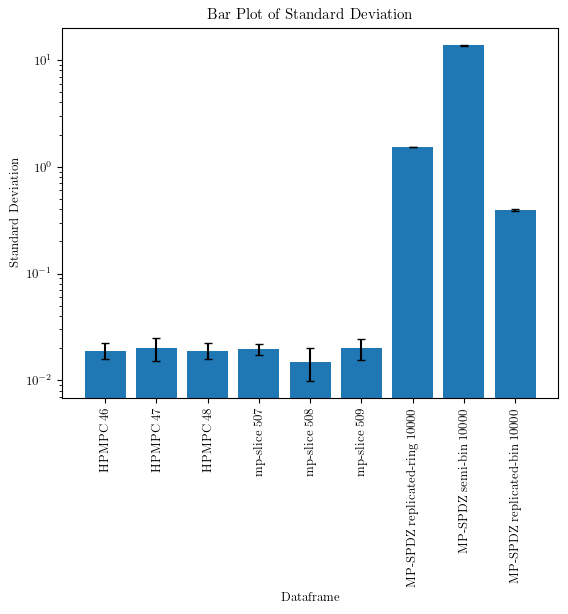

In [349]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the 'mean' and 'std' values separately
mean_values = [df['mean'].iloc[0] for df in bandwidth]
std_values = [df['std'].iloc[0] for df in bandwidth]

# Create a bar plot with 'mean' values as the height of the bars and 'std' values as standard deviation
fig, ax = plt.subplots()
ax.bar(label, mean_values,yerr=std_values,capsize=3)

plt.xticks(rotation='vertical')

# Add labels and title
plt.xlabel('Dataframe')
plt.ylabel('Standard Deviation')
plt.title('Bar Plot of Standard Deviation')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Show the plot
plt.show()


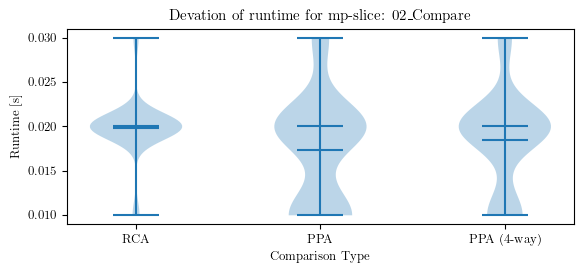

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt
# Example data
fig, ax = plt.subplots()

pos = 1
deviation61 = data[pos].loc[(data[pos]['function'] == 507) & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
deviation62 = data[pos].loc[(data[pos]['function'] == 508)  & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()
deviation63 = data[pos].loc[(data[pos]['function'] == 509) & (data[pos]['packetdrops(%)'] == 0) & (data[pos]['latencies(ms)'] == 0) & (data[pos]['preprocess']==0), ['runtime_external(s)']].values.flatten().tolist()

# Plot the first violin plot
two_dimensional_list = [deviation61, deviation62, deviation63]
ax.violinplot(two_dimensional_list, showmeans=True, showmedians=True)
# Set the x-tick labels
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["RCA", "PPA", "PPA (4-way)"])


# Set plot title and labels
plt.title(f"Devation of runtime for {framworks[pos]}: {experiment}")
plt.xlabel("Comparison Type")
plt.ylabel("Runtime [s]")
ax.figure.set_size_inches(5.91, 2.8)
fig.tight_layout()
plt.savefig("HPMPC_deviation.png",dpi=300,bbox_inches='tight')
plt.show()